# Density Based Spatial Clustering of Applications with Noise (DBSCAN)

### Pros:
1\. **No Need to Specify k**: Automatically detects the number of clusters.  
2\. **Robust to Outliers**: Naturally identifies and excludes noise points.  
3\. **Can Find Arbitrarily Shaped Clusters**: Not limited to spherical clusters.  
4\. **Simple Intuition**: Based on density and local neighborhoods.  

### Cons:
1\. **Parameter Sensitivity**: Choosing appropriate $`\varepsilon`$ and `minPts` is crucial.  
2\. **Fails with Varying Densities**: Struggles when cluster densities differ significantly.  
3\. **Not Scalable to Very Large Datasets**: Naive implementations have high time complexity.  
4\. **Distance Metric Dependency**: Performance depends on the choice of distance function and feature scaling.

There are two parameters in DBSCAN: min_samples and eps.If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample. Core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.

**The parameter eps is somewhat more important, as it determines what it means for points to be “close.”**<br>
**The min_samples setting mostly determines whether points in less dense regions will be labeled as outliers or as their own clusters.**

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [4]:
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
#DBSCAN does not allow predictions on new test data, so we will use the fit_predict method to perform clustering and return the cluster labels in one step:
clusters = dbscan.fit_predict(X)
print(f"Cluster memberships:\n{clusters}")

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


All data points were assigned the label -1, which stands for noise. This is a consequence of the default parameter settings for eps and min_samples, which are not tuned for small toy datasets.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


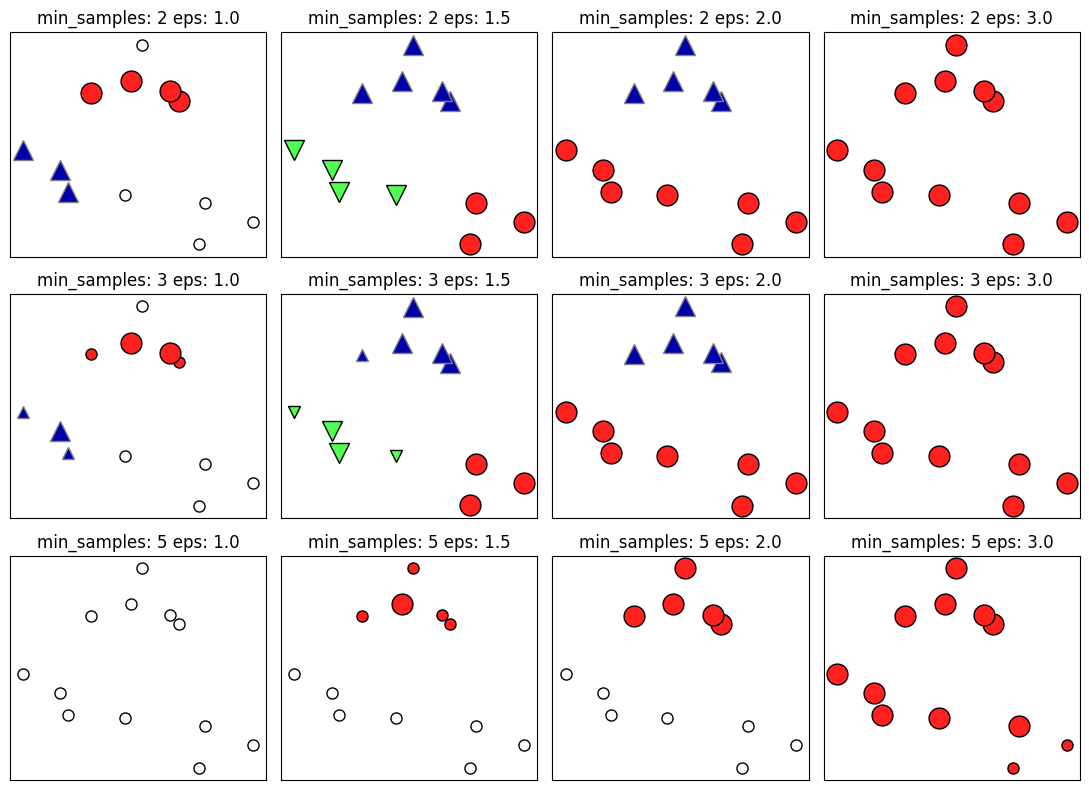

In [ ]:
#In this plot, points that belong to clusters are solid, while the noise points are shown in white.
#Core samples are shown as large markers, while boundary points are displayed as smaller markers.
mglearn.plots.plot_dbscan()

### Running DBSCAN on the two_moons dataset

In [ ]:
#Finding a good setting for eps is sometimes easier after scaling the data using StandardScaler or MinMaxScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()